In [16]:
import random
import cv2
import matplotlib.pyplot as plt
import albumentations as A

In [17]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White

def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img

def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)
    
def visualizeImg(image):
    img = image.copy()
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [18]:
image = cv2.imread("image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

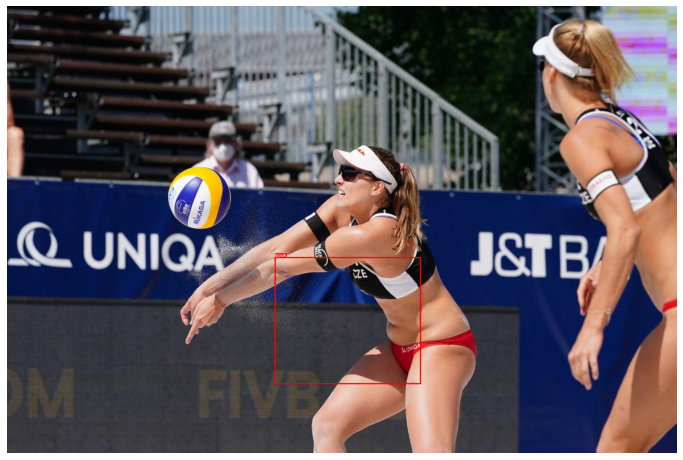

In [19]:
bboxes = [[640.66, 600.95, 347.09, 300.88]]
category_ids = [17, 18]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {17: 'book', 18: 'face'}
#category_id_to_name = {17: 'cat', 18: 'dog'}

visualize(image, bboxes, category_ids, category_id_to_name)

In [20]:
transform = A.Compose(
    [A.HorizontalFlip(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

AssertionError: 

In [ ]:
transform = A.Compose([
    A.RandomGridShuffle(always_apply=True),
],
)

transformed = transform(image=image)
visualizeImg(transformed['image'])

In [ ]:
transform = A.Compose([
    A.UnpropShuffle(always_apply=True),
], #bbox_params =A.BboxParams(format = 'coco', label_fields = ['category_ids']),
)

transformed = transform(image=image)
visualizeImg(transformed['image'])

#transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
#visualize(
#    transformed['image'],
#    transformed['bboxes'],
#    transformed['category_ids'],
#    category_id_to_name,
#)